In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import random

In [24]:
def extract_data(data='Dataset.csv'):
    df = pd.read_csv(data, sep=',')
    return df

# Ahora con esta data, quiero obtener una lista de los valores de Largo y Ancho para cada clase
def obtain_measures(data):
    ''' Acá obtengo una lista con los valores de largo y ancho para cada clase'''
    # dataframes de cada clase
    dataframe_clase_1 = data[data['Clase'] == 1]
    dataframe_clase_2 = data[data['Clase'] == 2]
    # Inicializamos listas para cada clase
    h_c1 = []
    w_c1 = []
    h_c2 = []
    w_c2 = []

    for index, row in data.iterrows():
        clase = row['Clase']
        largo = row['Largo']
        ancho = row['Ancho']
        # Agregamos los valores a la lista correspondiente según la clase
        if clase == 1:
            h_c1.append(largo)
            w_c1.append(ancho)
        elif clase == 2:
            h_c2.append(largo)
            w_c2.append(ancho)

    return h_c1, w_c1, h_c2, w_c2

def cuantizacion( data, steps = 20):
    """
    Cuantización del vector <data> en <steps> niveles.
    Es como un especie de discretización de los datos.
    """
    if steps < 2:
        steps = 2
    bins = np.arange(0.0,1.0+(1/steps), 1/steps)
    bins = (np.max(data)-np.min(data))*bins + np.min(data) #determina los límites de cada bin-
    bins = bins[1:-1]
    return np.digitize(data,bins)


/home/bryan/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bryan/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


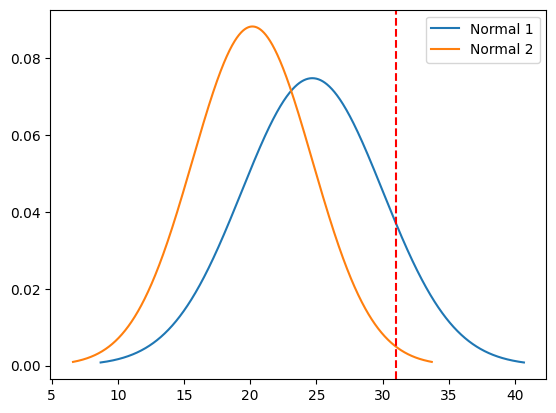

pertenece a normal 1
100
perf = 0.61
67
perf = 0.8805970149253731


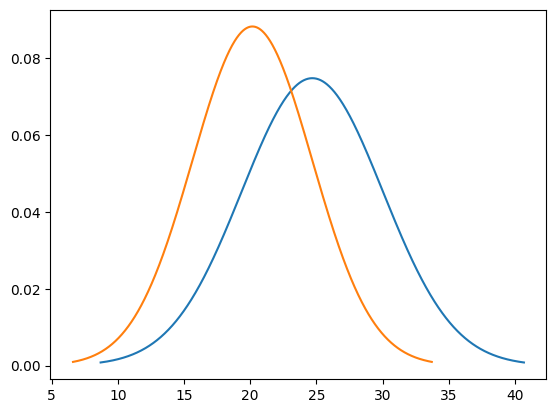

In [25]:
data = extract_data()
h_c1, w_c1, h_c2, w_c2 = obtain_measures(data) 


def values(data):
    sigma= np.std(data)
    media_muestra = np.mean(data)
#mu_0 = np.mean(w_c1[:20])
    mu_0 = data[0]
    n= len(data)
    sigma_0 = 1
    return sigma_0, sigma, mu_0, n, media_muestra


def evolution(data, sigma_0, sigma, mu_0, n):
    results_media, results_sigma = [], []
    for i in range(0, len(data)):
        media = ((n*(sigma_0**2))/(n*(sigma_0**2) +sigma**2)) * np.mean(data[:i]) + ((sigma**2)/(n*(sigma_0**2)+sigma**2))*mu_0
        Sigma = ((sigma_0**2)*(sigma**2))/(n*(sigma_0**2)+(sigma**2))
        results_media.append(media)
        results_sigma.append(Sigma)
    return results_media, results_sigma

def plot_values(medias1, sigmas1, medias2, sigmas2, label1, label2): 
    x1 = np.linspace(medias1[-1] - 3* sigmas1, medias1[-1] + 3*sigmas1, 1000)
    x2 = np.linspace(medias2[-1] - 3* sigmas2, medias2[-1] + 3*sigmas2, 1000)
    normal1= stats.norm.pdf(x1, medias1[-1], sigmas1)
    normal2 = stats.norm.pdf(x2, medias2[-1], sigmas2)
    
    plt.plot(x1, normal1)
    plt.plot(x2, normal2)
    plt.show() 


def performance(medias1, sigmas1, medias2, sigmas2, tests, from_which_data, plot = False):
    #x = np.linspace(medias2[-1] - 3* sigmas2, medias1[-1] + 3*sigmas1, 10000)
    x1 = np.linspace(medias1[-1] - 3* sigmas1, medias1[-1] + 3*sigmas1, 1000)
    x2 = np.linspace(medias2[-1] - 3* sigmas2, medias2[-1] + 3*sigmas2, 1000)
    normal1= stats.norm.pdf(x1, medias1[-1], sigmas1)
    normal2 = stats.norm.pdf(x2, medias2[-1], sigmas2)
    if plot == True:
        example = tests[0]
        plt.plot(x1, normal1, label = "Normal 1")
        plt.plot(x2, normal2, label = "Normal 2")
        plt.axvline(x=example, color='r', linestyle='--')  # Agrega una línea vertical en la posición de 'example'
        plt.legend()
        plt.show() 
        index1 = np.argmin(np.abs(x1-example)) #busco el índice del elemento en x1 que más cerca está de elem 
        index2 = np.argmin(np.abs(x2-example)) #busco el índice del elemento en x2 que más cerca está de elem 
        
        if normal1[index1]-normal2[index2] >0: print("pertenece a normal 1")
        else: print("pertenece a normal 2")
    aciertos = 0
    for elem in tests:
        #index1 = np.argmax(np.abs(normal1-elem))
        #index2 = np.argmax(np.abs(normal2-elem))
        index1 = np.argmin(np.abs(x1-elem)) #busco el índice del elemento en x1 que más cerca está de elem 
        index2 = np.argmin(np.abs(x2-elem)) #busco el índice del elemento en x2 que más cerca está de elem 
        if from_which_data == 1:
            if normal1[index1]-normal2[index2] >0: aciertos+=1   #si da que en la dist correcta > que la otra 
        elif from_which_data == 2:
            if normal2[index2]-normal1[index1] >0: aciertos+=1
    perf = aciertos / len(tests)
    print(len(tests))
    print(f"perf = {perf}")
    return perf

sigma_0, sigma, mu_0,n, media_muestra = values(w_c1)
sigma_0_2, sigma2, mu_0_2,n2, media_muestra2 = values(w_c2)

#Ancho 1
media_1_random = random.sample(w_c1, len(w_c1))
media1_muestras =media_1_random[:int(len(media_1_random)*0.7)]
media1_tests =media_1_random[int(len(media_1_random)*0.7):]

#Ancho 2
media_2_random = random.sample(w_c2, len(w_c2))
media2_muestras =media_2_random[:int(len(media_2_random)*0.7)]
media2_tests =media_2_random[int(len(media_2_random)*0.7):]

sigma_1 = np.std(media1_muestras)
sigma_2 = np.std(media2_muestras)

#tenemos desvio estándar conocido
results_media1, results_sigma1 = evolution(media1_muestras, sigma_0, sigma_1,media1_muestras[-1],len(media1_muestras) )  #usar sigma de la muestra reducida
results_media2, results_sigma2 = evolution(media2_muestras, sigma_0, sigma_2,media2_muestras[-1], len(media2_muestras) )

#np.cov
#plot_values(results_media1, sigma_1, results_media2, sigma_2, "ancho 1", "ancho 2")
performance(results_media1, sigma_1, results_media2, sigma_2, media1_tests, 1, True)
performance(results_media1, sigma_1, results_media2, sigma_2, media2_tests, 2, True)
plot_values(results_media1, sigma_1, results_media2, sigma_2, "ancho 1", "ancho 2")
#error = std/raiz de n
#cuando muestras son dependientes, abajo no va raiz (para el error)
#estos metodos nos sirven para hallar media. el grafico de la normal es la densidad de la prob de que mu sea tal valor. o sea, esa dist 
#tiene mu y sigma que describen distribución (distrib normal estima mu)
#performance: q tan superpuestas estan curvas. si p=1 están muy alejadas. si = 0.5 están muy superpuestas


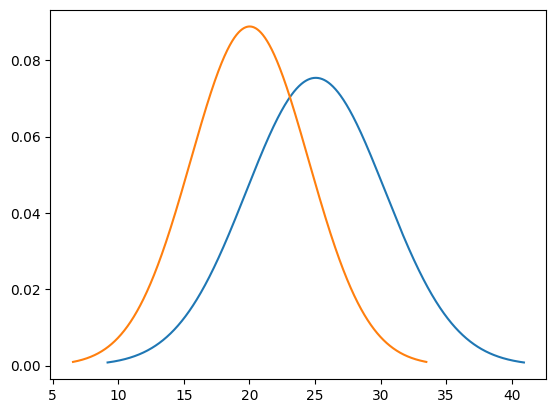

100
perf = 0.61
67
perf = 0.8507462686567164


0.8507462686567164

In [26]:

media_1_random = random.sample(w_c1, len(w_c1))
media1_muestras =media_1_random[:int(len(media_1_random)*0.7)]
media1_tests =media_1_random[int(len(media_1_random)*0.7):]


media_2_random = random.sample(w_c2, len(w_c2))
media2_muestras =media_2_random[:int(len(media_2_random)*0.7)]
media2_tests =media_2_random[int(len(media_2_random)*0.7):]

sigma_1 = np.std(media1_muestras)
sigma_2 = np.std(media2_muestras)

#tenemos desvio estándar conocido
results_media1, results_sigma1 = evolution(media1_muestras, sigma_0, sigma_1,media1_muestras[-1],len(media1_muestras) )  #usar sigma de la muestra reducida
results_media2, results_sigma2 = evolution(media2_muestras, sigma_0, sigma_2,media2_muestras[-1], len(media2_muestras) )

#np.cov
plot_values(results_media1, sigma_1, results_media2, sigma_2, "ancho 1", "ancho 2")
performance(results_media1, sigma_1, results_media2, sigma_2, media1_tests, 1)
performance(results_media1, sigma_1, results_media2, sigma_2, media2_tests, 2)